# PROBLEM STATEMENT(Big Data Mart Sales Problem)

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

# IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# - Import all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

#  - Load Dataset

In [ ]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df

In [ ]:
#checking the first five rows
df.head()

In [ ]:
#checking the last five rows
df.tail()

In [ ]:
#picking 4 random samples
df.sample(4)

# Step 2.3 - Data Descriptive Analysis

In [ ]:
#checking the data shape
df.shape

In [ ]:
#checking for nature of datatypes
df.dtypes

In [ ]:
#Checking data info
df.info()

In [ ]:
#Checking data description for all numerical columns
df.describe()

In [ ]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

In [ ]:
#lets check the columns
df.columns

In [ ]:
#Checking for null values
df.isnull().sum()

In [ ]:
#Checking for null values
df.isnull().sum().sum()

In [ ]:
df.dtypes

In [ ]:
#Checking the content of each Categorical columns
print("The Value Counts in Item_Identifier - ",Counter(df['Item_Identifier']))
print("The Value Counts in Item_Fat_Content - ",Counter(df['Item_Fat_Content']))
print("The Value Counts in Item_Type - ",Counter(df['Item_Type']))
print("The Value Counts in Outlet_Identifier - ",Counter(df['Outlet_Identifier']))
print("The Value Counts in Outlet_Size - ",Counter(df['Outlet_Size']))
print("The Value Counts in Outlet_Location_Type - ",Counter(df['Outlet_Location_Type']))
print("The Value Counts in Outlet_Type - ",Counter(df['Outlet_Type']))

In [ ]:
#Checking the content of each Categorical columns
df['Item_Identifier'].value_counts()

In [ ]:
df['Item_Fat_Content'].value_counts()

In [ ]:
df['Item_Type'].value_counts()

In [ ]:
df['Outlet_Identifier'].value_counts()

In [ ]:
df['Outlet_Size'].value_counts()

In [ ]:
df['Outlet_Location_Type'].value_counts()

In [ ]:
df['Outlet_Type'].value_counts()

In [ ]:
df.dtypes




# The Train Dataset is made up of;
- 8523 rows and 12 columns
- 11 features and 1 Target

# Description of Features:
1. Item_Identifier: 
- It is made up of Categorical data
- It has 1559 factors; FDW13,FDG33,NCY18,FDD38,DRE49 etc 
- It has no null values
- Its Datatype is an Object type

2. Item_Weight:
- It is made up of Continuos data
- It has null values to the tune of 1463
- Its Datatype is an floating type

3. Item_Fat_Content: 
- It is made up of Categorical data
- It has 5 factors; Low Fat(5089), Regular(2889), LF(316), reg(117), low fat(112)
- It has no null values
- Its Datatype is an Object type

4. Item_Visibility:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

5. Item_Type: 
- It is made up of Categorical data
- It has 16 factors; Fruits and Vegetables(1232), nack Foods(1200), Household(910), Frozen Foods(856), Dairy(682), Canned(649)                        Baking Goods(648), Health and Hygiene(520),Soft Drinks(445), Meat(425), Breads(251), Hard Drinks(214),                          Others(169), Starchy Foods(148),Breakfast(110),Seafood(64)
- It has no null values
- Its Datatype is an Object type

6. Item_MRP:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

7. Outlet_Identifier: 
- It is made up of Categorical data
- It has 10 factors; OUT027(935), OUT013(932), OUT049(930), OUT046(930), OUT035(930), OUT045(929), OUT018(928), OUT017(926)
                     OUT010(555), OUT019(528)
- It has no null values
- Its Datatype is an Object type

8. Outlet_Establishment_Year:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

9. Outlet_Size: 
- It is made up of Categorical data
- It has 3 factors; Medium(2793), Small(2388), High(932)
- It has null values to the tune of 2410
- Its Datatype is an Object type

10. Outlet_Location_Type: 
- It is made up of Categorical data
- It has 3 factors; Tier 3(3350), Tier 2(2785), Tier 1(238)
- It has no null values
- Its Datatype is an Object type

11. Outlet_Type: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type


# About the Target/Label:
12. Item_Outlet_Sales: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data


**Since the target is made up of a continuos data hence this is a REGRESSION PROBLEM!

# EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

#  Count Distribution of Categorical Data - Univariate Analysis

In [ ]:
#Item_Identifier
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Item_Identifier',data=df)
print(df['Item_Identifier'].value_counts())

In [ ]:
#Item_Fat_Content
ax=sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())

In [ ]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Item_Type',data=df)
print(df['Item_Type'].value_counts())

In [ ]:
#Outlet_Identifier
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Outlet_Identifier',data=df)
print(df['Outlet_Identifier'].value_counts())

In [ ]:
#Outlet_Size
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Size',data=df)
print(df['Outlet_Size'].value_counts())

In [ ]:
#Outlet_Location_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Location_Type',data=df)
print(df['Outlet_Location_Type'].value_counts())

In [ ]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].value_counts())

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The Item_identifiers have a lot of factors(1559) which has affected the visibility of its plot
- Majority of the sample items are low in fat.
- Majority of the sample items were fruits and vegitables
- Majority of the samples were selected from Outlet number 27 under Supermarket 3 
- Majority of the samples were selected from Outlets with Medium Sizes
- Majority of the samples were selected from the Tier 3 Outlets
- Majority of the samples were selected from Supermarket Type1

# Updating Null values

In [ ]:
df.isnull().sum()

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Lets go!

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df

In [ ]:
#rechecing for null values
df.isnull().sum()

 # Observations on Null Update 
From the above we can see that all null values have been updated! 

Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [ ]:
#initializing....
enc=OrdinalEncoder()

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.sample(10)

In [ ]:
df.describe()

In [ ]:
df.dtypes

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

In [ ]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The normal distribution of these features; 'Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier'               'Outlet_Size', 'Outlet_Location_Type','Outlet_Type' has no contribution to our Model Building since they are categorical data

- The normal distribution of the Item_Outlet_sales columns also has no contribution to our Model Building since its the Target     variable

In [ ]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['Item_Outlet_Sales'],axis=1)
features

In [ ]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=12:#since there are 3 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Item_Outlet_Sales'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between some of the features and the Label(Item_Outlet_Sales).

#  Count Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the Categorical features and the Label

#  Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [ ]:
#checking for general correlation
df.corr()

In [ ]:
#checking for correlation between each feature and Label
df.corr()['Item_Outlet_Sales'].sort_values()

In [ ]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

In [ ]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

most features DO NOT share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

In [ ]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [ ]:
df.corr()['Item_Outlet_Sales'].sort_values()

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - Item_Visibility has a negative correlation of 13% with the target column which can be considered as a weak bond
 - Outlet_Size  has a negative correlation of 9% with the target column which can be considered as a weak bond
 - Outlet_Establishment_Year  has a negative correlation of 5% with the target column which can be considered as a weak bond
 - Item_Identifier has a positive correlation of 0.2% with the target column which can be considered as a poor bond
 - Item_Fat_Content  has a positive correlation of 0.009% with the target column which can be considered as a poor bond
 - Item_Weight  has a positive correlation of 0.01% with the target column which can be considered as a poor bond
 - Item_Type  has a positive correlation of 1.7% with the target column which can be considered as a  poor bond
 - Outlet_Location_Type  has a positive correlation of 8.9% with the target column which can be considered as a weak bond
 - Outlet_Identifier  has a positive correlation of 16% with the target column which can be considered as a fair bond
 - Outlet_Type   has a positive correlation of 40% with the target column which can be considered as a good bond
 - Item_MRP  has a positive correlation of 57% with the target column which can be considered as a good bond

 
 - Feature with Maximum correlation = '57%'
 - Feature with Minimum correlation = '0.2%'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

In [ ]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=12:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident ONLY the item_visibility feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

#  Skewness Check

In [ ]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [ ]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

- Item visibility
- Item_Fat_Content
- Outlet_Type

#  DATA PREPROCESSING

# Removal of Duplicates and Unwanted Column

In [ ]:
#Recheking shape of original data
df.shape

In [56]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(8523, 12)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

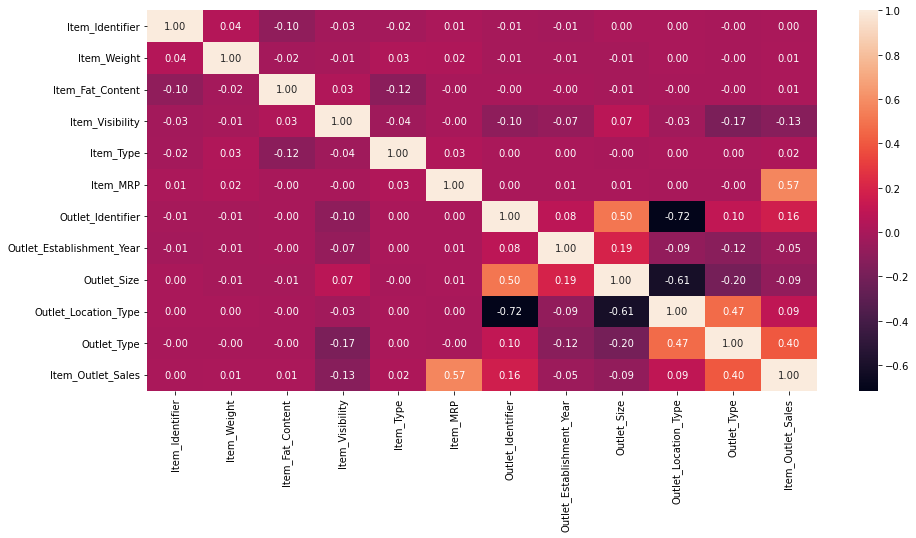

In [57]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [58]:
X=df.drop(columns=['Item_Outlet_Sales'])
Y=df['Item_Outlet_Sales']

In [59]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-1.38851383, -0.84187169, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.71799137, -1.64170589,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.26205684,  1.09855449, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.28515188, -0.53424315, -0.57284357, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-0.21975905, -1.33644372,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-1.62449099,  0.45963367, -0.57284357, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [60]:
#checking the shape
X_Scaled.shape

(8523, 11)

Now we shall treat the above shape as an array of numbers(tuple) where 8523 and 11 are the zeroth and first index respectively.

In [61]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [62]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [63]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,1.013706,Item_Identifier
1,1.003732,Item_Weight
2,1.025474,Item_Fat_Content
3,1.064255,Item_Visibility
4,1.017436,Item_Type
5,1.001978,Item_MRP
6,4.149231,Outlet_Identifier
7,1.082108,Outlet_Establishment_Year
8,1.715129,Outlet_Size
9,5.866098,Outlet_Location_Type


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [64]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.388514,0.841872,0.572844,0.970732,0.766479,1.747454,1.507813,0.139541,0.284581,1.369334,0.252658,0.910601
1,1.717991,1.641706,0.978092,0.908111,1.608963,1.489023,0.607071,1.334103,0.284581,1.091569,1.002972,1.018440
2,0.262057,1.098554,0.572844,0.956917,0.658786,0.010040,1.507813,0.139541,0.284581,1.369334,0.252658,0.049238
3,0.759769,1.500838,0.978092,1.281758,0.291391,0.660050,1.664513,0.020085,0.284581,1.091569,1.508289,0.849103
4,1.151580,0.929428,0.572844,1.281758,0.421242,1.399220,1.312032,1.293934,1.950437,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.912107,1.418084,0.572844,0.181193,1.371418,1.180783,1.312032,1.293934,1.950437,1.091569,0.252658,0.349915
8519,0.261100,1.059578,0.978092,0.371154,1.716656,0.527301,0.802852,0.497909,0.284581,0.138882,0.252658,0.956402
8520,1.285152,0.534243,0.572844,0.599784,0.183698,0.897208,0.450371,0.736822,1.381274,0.138882,0.252658,0.579100
8521,0.219759,1.336444,0.978092,1.532880,1.371418,0.607977,0.607071,1.334103,0.284581,1.091569,1.002972,0.196725


In [65]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(8523, 12)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [66]:
#index number
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [67]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (8523, 12)
New DataFrame (8222, 12)
total_dropped_rows 301


A Total of 301 outliers have been removed! Lets move on! Data is looking great!

In [68]:
#Checking the new dataframe with non-outliers
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


Now we need to reset our data having removed outliers.....

In [69]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [70]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


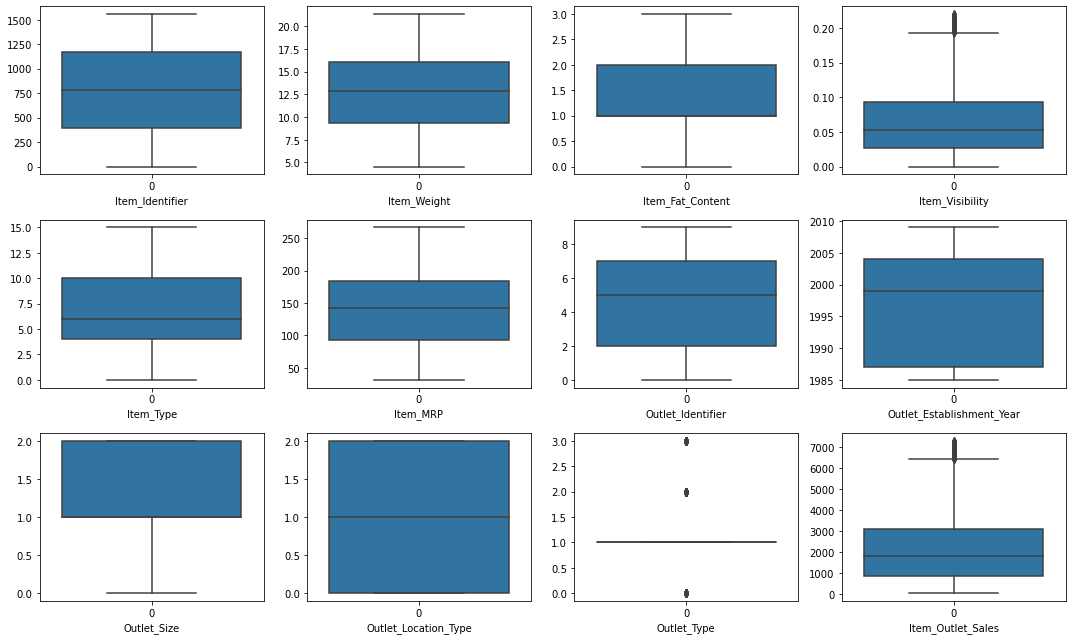

In [71]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=12:
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# - Transforming Data to Remove Skewness using Power transformation

In [73]:
#rechecking for skewness...
df_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the sales         column

- For the skewness data, only the newspaper column has skewness in its data

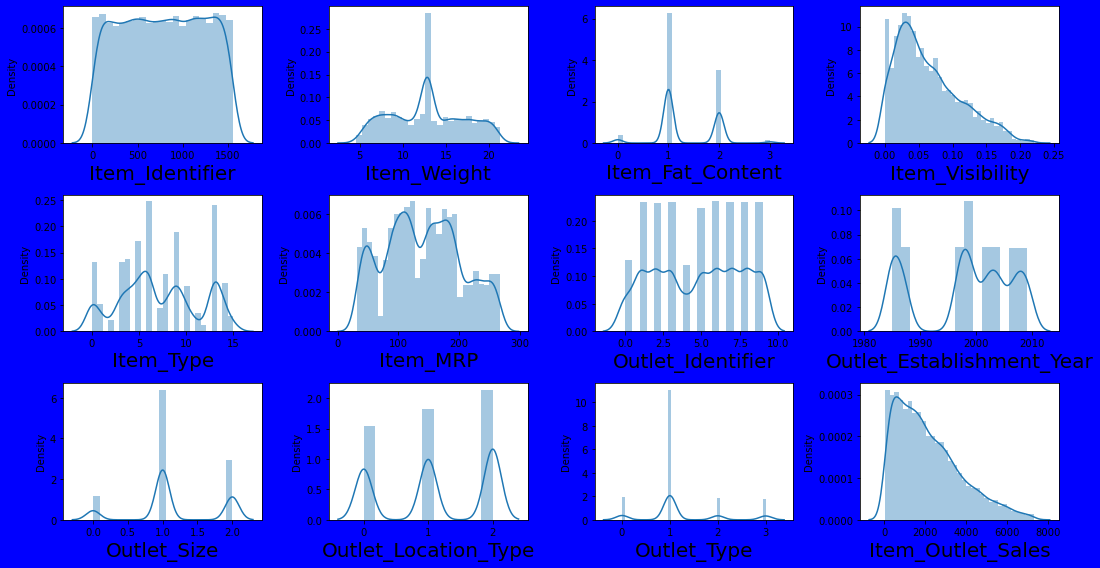

In [74]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

In [75]:
#Firstly, replacing zero values in the continuos columns with the mean (since its made up of continuos data)
df_new['Item_Weight']=df_new['Item_Weight'].replace(0,df_new['Item_Weight'].mean())
df_new['Item_Visibility']=df_new['Item_Visibility'].replace(0,df_new['Item_Visibility'].mean())
df_new['Item_MRP']=df_new['Item_MRP'].replace(0,df_new['Item_MRP'].mean())
df_new['Outlet_Establishment_Year']=df_new['Outlet_Establishment_Year'].replace(0,df_new['Outlet_Establishment_Year'].mean())

Let lets go ahead and apply Power Transformation!

In [76]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [77]:
#extracting the columns that are skewed
data=['Item_Visibility']

In [78]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [79]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,-1.442588,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,-1.312419,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,-1.413501,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.113966,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.113966,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,-0.074259,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,897.0,8.380,2.0,-0.354574,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,1357.0,10.600,1.0,-0.730140,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,681.0,7.210,2.0,1.551287,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


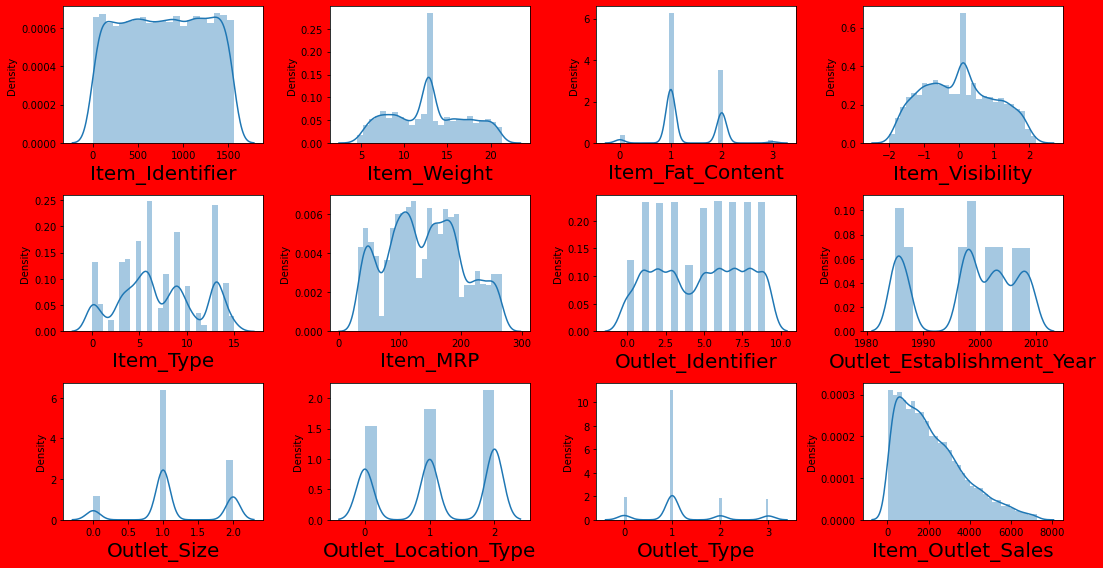

In [80]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [81]:
#rechecking for skewness
df_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.124840
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

From the above you can see all skewness in all continuos data are now within the threshold of +/-0.5 which was chosen earlier!

From the above we can see that skewness has been removed!

NOTE:
- All continuos data columns was considered for skewness removal
- The Item_Outlet_Sales column is not considered for skewness since its the Target data

#  Seperating the datasets into X and Y variables

In [82]:
#seperation
X=df_new.drop(columns=['Item_Outlet_Sales'])
Y=df_new['Item_Outlet_Sales']

# Transforming data into standard normal distribution

In [83]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [84]:
#reconfirming that mean is 0
X_Scaled.mean()

1.2385022600172628e-16

In [85]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

#  MODEL BUILDING

# Linear Regression

# Best Random State

In [86]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  50.18 and 49.77 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  863.12 and 857.9 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1295601.24 and 857.9 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1138.24 and 29.29 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  49.01 and 50.05 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  852.65 and 861.19 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1235857.2 and 861.19 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1111.69 and 29.35 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  49.91 and 49.84 respectively
At random state of :- 

The best accuracy is 53.58% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

In [88]:
x_train.shape

(6577, 11)

In [89]:
x_test.shape

(1645, 11)

In [90]:
y_train.shape

(6577,)

In [91]:
y_test.shape

(1645,)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [92]:
lm=LinearRegression()#Initializing...
lm.fit(x_train,y_train)#Training...
pred_test=lm.predict(x_test)#Prediciting using test data...
pred_train=lm.predict(x_train)#Prediciting using training data...
Test_Accuracy_lm= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_lm= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_lm= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_lm= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_lm= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_lm= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_lm= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_lm= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_lm)#printing mean absolute error
print("Test_MSE ", Test_mse_lm)#printing mean squared error
print("Test_RMSE ", Test_rmse_lm)#printing root mean squared error

Test_Accuracy  53.56
Test_MAE  838.4740464502506
Test_MSE  1177240.0924517743
Test_RMSE  1085.0069550246092


LinearRegression is producing average accuracy 53.56% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [93]:
#Validation accuracy
vac=cross_val_score(lm,X,Y,cv=5)
CV_Score_lm=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lm)

[0.51427188 0.49529771 0.47944757 0.49709669 0.49546906]
Cross Validation Score is  0.4963165792197032


# Difference between Accuracy Score and Cross Validation Score

In [94]:
Test_Accuracy_lm

0.5355531090293815

In [95]:
CV_Score_lm

0.4963165792197032

In [96]:
lm_Acc_vs_CV_Score=np.abs(Test_Accuracy_lm-CV_Score_lm)
print("Difference between Accuracy and Cross Validation Score = ",lm_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.03923652980967829


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.039) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - KNN Regressor

# Best Random State

In [97]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  48.51 and 66.65 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  839.58 and 660.2 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1339046.06 and 660.2 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1157.17 and 25.69 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  46.91 and 66.33 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  819.21 and 673.4 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1286807.23 and 673.4 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1134.38 and 25.95 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  48.95 and 66.24 respectively
At random state of :-  

The best accuracy is 52.98% at random state 88

We have found best_random state value as 88. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=88,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [99]:
knn=KNeighborsRegressor()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_knn= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_knn= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_knn= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_knn= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_knn= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_knn= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_knn= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_knn)#printing mean absolute error
print("Test_MSE ", Test_mse_knn)#printing mean squared error
print("Test_RMSE ", Test_rmse_knn)#printing root mean squared error

Test_Accuracy  52.98
Test_MAE  767.9874696899695
Test_MSE  1122625.529152324
Test_RMSE  1059.540244234415


KNeighbors is producing average accuracy 52.98% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [100]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.21273941 0.19163343 0.18404045 0.19110128 0.19954912]
Cross Validation Score is  0.19581273927548387


# Difference between Accuracy Score and Cross Validation Score

In [101]:
Test_Accuracy_knn

0.5298123585250105

In [102]:
CV_Score_knn

0.19581273927548387

In [103]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.33399961924952665


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.333) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# - Decision Tree Regressor

In [104]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  20.55 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1033.86 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  2066078.74 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1437.39 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  17.54 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1002.76 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1998530.04 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1413.69 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  15.14 and 100.0 respectively
At random state of :-  2 the mean

The best accuracy is 23.1% at random state 106

We have found best_random state value as 106. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=106,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [106]:
dt=DecisionTreeRegressor()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_dt= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_dt= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_dt= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_dt= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_dt= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_dt= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_dt= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_dt)#printing mean absolute error
print("Test_MSE ", Test_mse_dt)#printing mean squared error
print("Test_RMSE ", Test_rmse_dt)#printing root mean squared error

Test_Accuracy  23.08
Test_MAE  1019.7315899088145
Test_MSE  1968306.4844475703
Test_RMSE  1402.9634651150293


Decision Tree is producing average accuracy 50.8% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [107]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.17694369 0.09951857 0.07324609 0.11908954 0.19135351]
Cross Validation Score is  0.13203028028920735


# Difference between Accuracy Score and Cross Validation Score

In [108]:
Test_Accuracy_dt

0.23076992619110137

In [109]:
CV_Score_dt

0.13203028028920735

In [ ]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.312) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# RandomForest Regressor

# Best Random State

In [ ]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


The best accuracy is 59.32% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [ ]:
#using the random state of 6
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
rf=RandomForestRegressor()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

RandomForest is producing fair accuracy = 53.56%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_rf

In [ ]:
CV_Score_rf

In [ ]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low (0.039) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# AdaBoost Classifier

# Best Random State 

In [ ]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 60.3% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
ada=AdaBoostRegressor()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ada= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ada= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ada= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ada= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ada= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ada= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ada= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ada)#printing mean absolute error
print("Test_MSE ", Test_mse_ada)#printing mean squared error
print("Test_RMSE ", Test_rmse_ada)#printing root mean squared error

AdaBoost is producing good accuracy = 60.32%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_ada

In [ ]:
CV_Score_ada

In [ ]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low (0.050) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# GradientBoosting Classifier

# Best Random State

In [ ]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 63.57% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

GradientBoosting is producing good accuracy = 63.56%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_gb

In [ ]:
CV_Score_gb

In [ ]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low (0.052) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# XGBoost Classifier

# Best Random State

In [ ]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 58.27% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

XGBoost is producing good accuracy = 58.27%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_xgb

In [ ]:
CV_Score_xgb

In [ ]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low (0.076) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# ExtraTrees Regressor

# Best Random State

In [ ]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 59.41% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

ExtraTress  is producing good accuracy = 59.19%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_ex

In [ ]:
CV_Score_ex

In [ ]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low (0.070) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Support Vector Regressor(SVR)

# Best Random State

In [ ]:
#Using Support Vector Regressor to get the best Random state
sv=SVR()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 7.9% at random state 14

We have found best_random state value as 14. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=14,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [ ]:
sv=SVR()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_sv= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_sv= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_sv= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_sv= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_sv= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_sv= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_sv= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_sv)#printing mean absolute error
print("Test_MSE ", Test_mse_sv)#printing mean squared error
print("Test_RMSE ", Test_rmse_sv)#printing root mean squared error

Support Vector is producing good accuracy = 7.9%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_sv

In [ ]:
CV_Score_sv

In [ ]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is low(0.121) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 9 models in total lets compare each of them and find the best Model!

#  COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [ ]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','KNeigbors Regressor','DecisionTree Regressor','Random Forest Regressor','Ada Boosting Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor','SVR'],'Accuracy_Score' : [Test_Accuracy_lm,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lm,CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lm_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score],'MAE':[Test_mae_lm,Test_mae_knn,Test_mae_dt,Test_mae_rf,Test_mae_ada,Test_mae_gb,Test_mae_xgb,Test_mae_ex,Test_mae_sv],'MSE':[Test_mse_lm,Test_mse_knn,Test_mse_dt,Test_mse_rf,Test_mse_ada,Test_mse_gb,Test_mse_xgb,Test_mse_ex,Test_mse_sv],'RMSE':[Test_rmse_lm,Test_rmse_knn,Test_rmse_dt,Test_rmse_rf,Test_rmse_ada,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex,Test_rmse_sv]})
models

In [ ]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

In [ ]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Gradient Boost(63.56%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

#  Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [ ]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

In [ ]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is STILL ExtraTrees Regressor!

# Conclusion on Best Choice of Model

From the above we can see:
 - The Model with least difference(0.008) between Accuracy Score(r2 score) and Cross Validation Score is EXTRATREES REGRESSOR!
 
 - It has the lowest Root Mean Square Error(RMSE): 0.4

# Hence Optimum Machine Model Chosen = EXTRATREES REGRESSION MODEL!

# HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [112]:
ex=ExtraTreesRegressor()

In [113]:
param_grid = {'n_estimators': [10,50,100],'criterion': ['mse', 'mae'],'max_depth': [2,8,16,32,50],'max_features': ['auto','sqrt','log2'],'bootstrap': [True, False],'warm_start': [True, False]}

In [ ]:
#Gridsearch
gridsearch = GridSearchCV(ex, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [ ]:
#Get best hyperparameters
gridsearch.best_params_

Now lets use the best parameters.....

In [ ]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='mse',max_depth=50,max_features='auto',n_estimators=10,warm_start=True)

In [ ]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='squared_error',max_depth=500,max_features='auto',n_estimators=500,min_samples_leaf=1,random_state=174,verbose=5,max_samples=100,ccp_alpha=0.0,bootstrap=True)

In [ ]:
#fitting the model...
ex.fit(x_train,y_train)

In [ ]:
pred_test=ex.predict(x_test)

In [ ]:
metrics.r2_score(y_test,pred_test)

From the above we can see:
- Final Accuracy is 98% and RMSE is 0.007
- That the ExtraTreeRegressor has a low RMSE

HENCE WE CAN CONCLUDE OUR MODEL IS GOOD!!

# MODEL SAVING

In [111]:
filename='Machine_Model_Project_bigmart '
pickle.dump(sv,open(filename,'wb'))

NameError: name 'sv' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 316
